<a href="https://colab.research.google.com/github/Sudip-06/Laptop-price-analysis/blob/main/Laptop_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laptop Price Analysis**

This project will help you understand how to analyze and predict laptop prices using a dataset
containing laptop specifications. It is a simple regression task where we predict the price of a laptop
based on its features like brand, processor, RAM, storage, etc.


**Problem Statement :**
The task is to build a machine learning model that can predict the price of laptops based
on their features.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/laptop_prices.csv")

In [ ]:
df.head(5)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
df.columns.to_list()

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'OS',
 'Weight',
 'Price_euros',
 'Screen',
 'ScreenW',
 'ScreenH',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_freq',
 'CPU_model',
 'PrimaryStorage',
 'SecondaryStorage',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model']

In [ ]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Product'].value_counts()

,count
Product,
XPS 13,30
Inspiron 3567,25
250 G6,21
Vostro 3568,19
Legion Y520-15IKBN,19
...,...
VivoBook E201NA,1
Ideapad 520-15IKBR,1
Thinkpad X260,1


In [ ]:
df['Inches'].value_counts()

,count
Inches,
15.6,647
14.0,193
17.3,164
13.3,160
12.5,39
11.6,31
12.0,6
13.5,6
13.9,6


In [ ]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,707
Gaming,205
Ultrabook,194
2 in 1 Convertible,117
Workstation,29
Netbook,23


In [ ]:
df['Ram'].value_counts()

,count
Ram,
8,613
4,367
16,198
6,35
12,25
32,17
2,16
24,3
64,1


In [ ]:
df['OS'].value_counts()

,count
OS,
Windows 10,1048
No OS,66
Linux,58
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [ ]:
print(df['Weight'].value_counts())

Weight
2.20    120
2.10     58
2.00     45
2.40     42
2.50     38
       ... 
4.50      1
1.14      1
3.80      1
3.25      1
2.34      1
Name: count, Length: 171, dtype: int64


In [ ]:
df['Price_euros'].value_counts()

,count
Price_euros,
1099.0,14
1799.0,14
1499.0,12
1199.0,11
1299.0,11
...,...
2090.0,1
304.0,1
759.0,1


In [ ]:
df['Screen'].value_counts()

,count
Screen,
Full HD,835
Standard,369
4K Ultra HD,43
Quad HD+,28


In [ ]:
company = df.groupby("Company")
company

<Axes: xlabel='Company'>

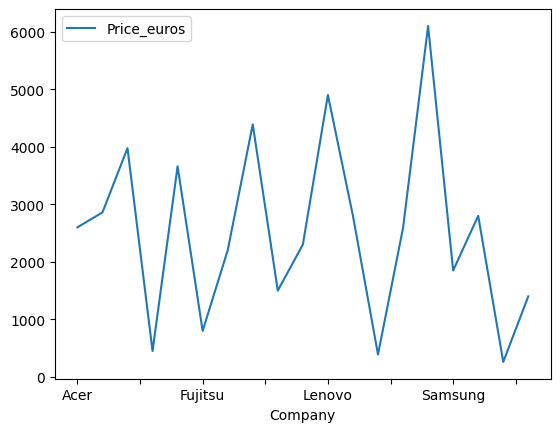

In [ ]:
company.max()[['Product', 'Price_euros']].plot()

<Axes: xlabel='Company'>

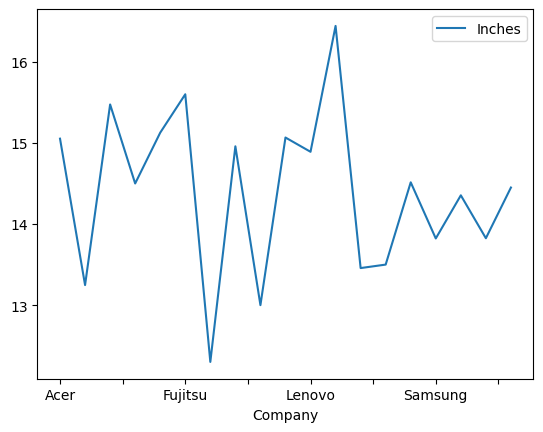

In [ ]:
company.mean(numeric_only=True)[['Inches']].plot()

<Axes: xlabel='Company'>

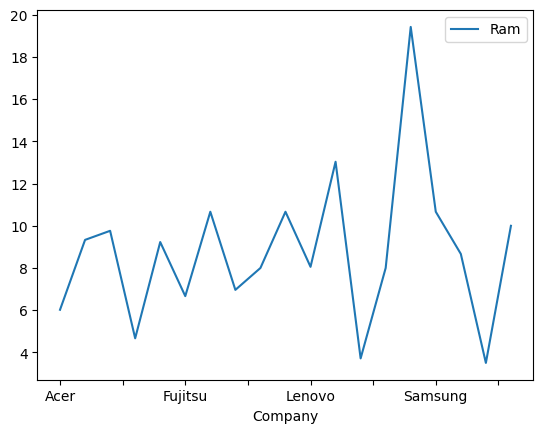

In [ ]:
company.mean(numeric_only=True)[['Ram']].plot()

<Axes: xlabel='Company'>

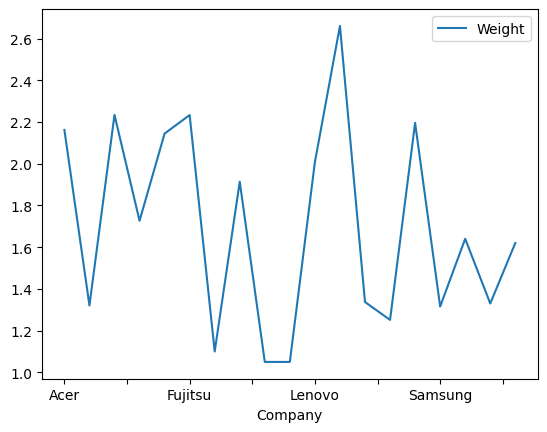

In [ ]:
company.mean(numeric_only=True)[['Weight']].plot()

In [ ]:
pivot = pd.pivot_table(index='TypeName', columns='Screen', data=df, values='Price_euros', aggfunc='count')
pivot

Screen,4K Ultra HD,Full HD,Quad HD+,Standard
TypeName,,,,
2 in 1 Convertible,7.0,76.0,7.0,27.0
Gaming,13.0,190.0,NaN,2.0
Netbook,NaN,4.0,NaN,19.0
Notebook,11.0,418.0,3.0,275.0
Ultrabook,8.0,123.0,18.0,45.0
Workstation,4.0,24.0,NaN,1.0


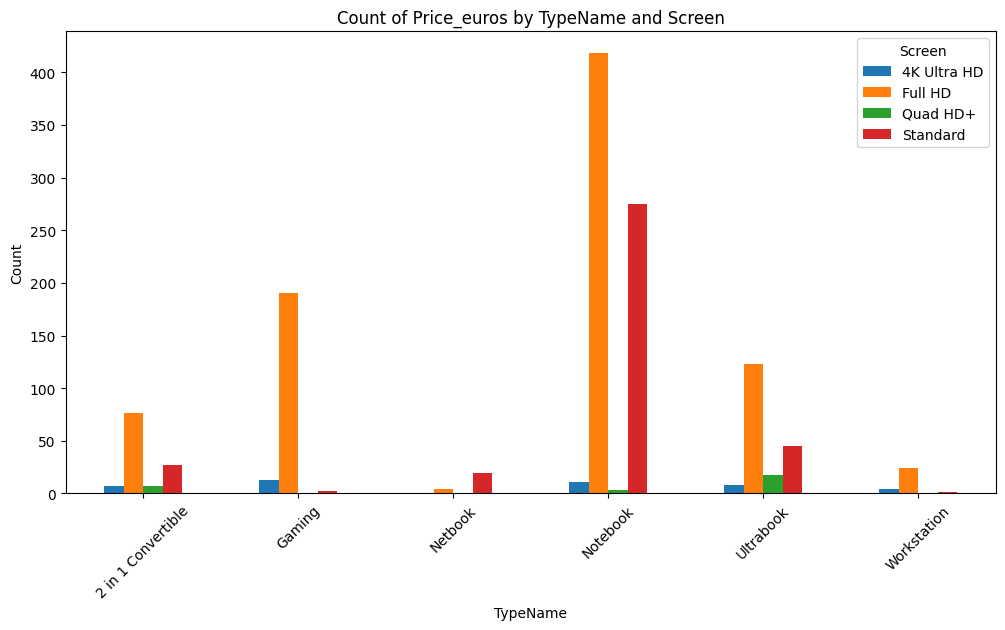

In [ ]:
pivot.plot(kind='bar', figsize=(12,6))
plt.title("Count of Price_euros by TypeName and Screen")
plt.xlabel('TypeName')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Screen')
plt.show()

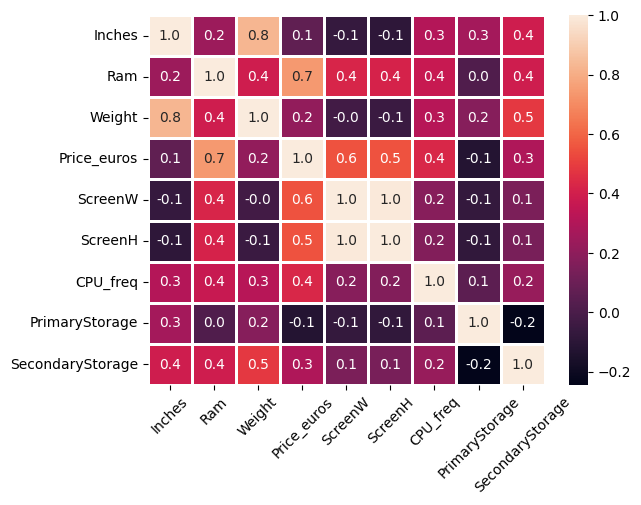

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', linewidths=1)
plt.xticks(rotation=45)
plt.show()

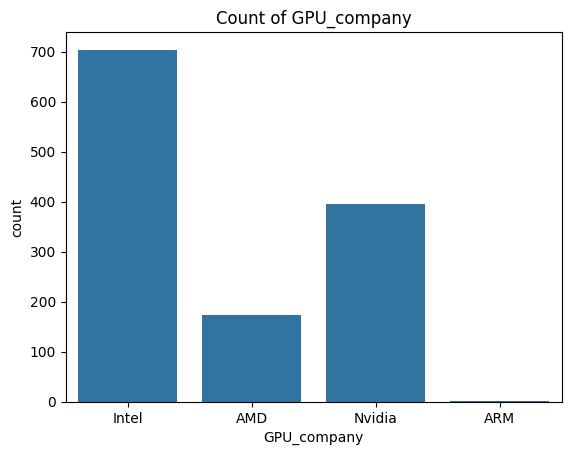

In [ ]:
sns.countplot(df, x='GPU_company' )
plt.title('Count of GPU_company')
plt.show()

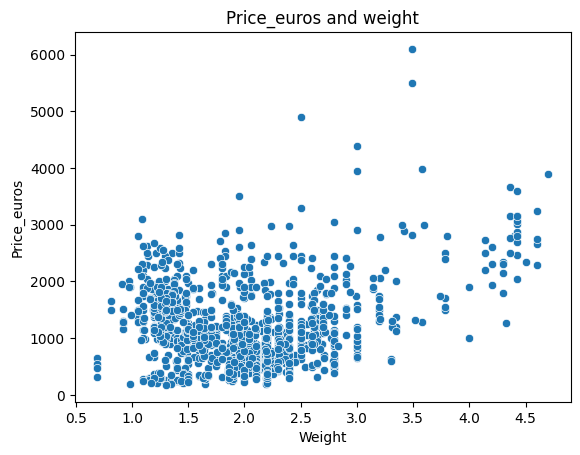

In [ ]:
sns.scatterplot(df, x="Weight", y="Price_euros")
plt.title("Price_euros and weight")
plt.show()

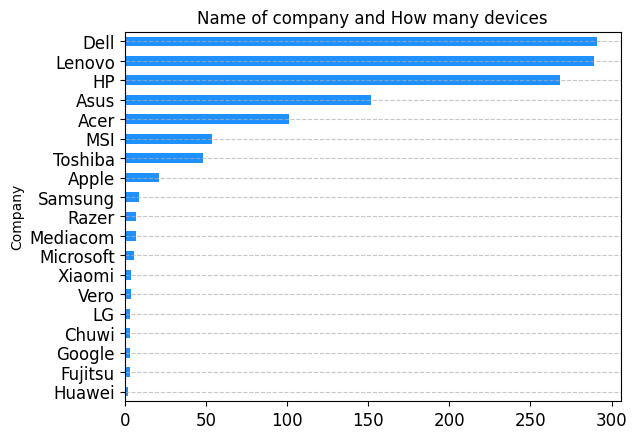

In [ ]:
df['Company'].value_counts().sort_values(ascending=True).plot(kind='barh', color='dodgerblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Name of company and How many devices")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

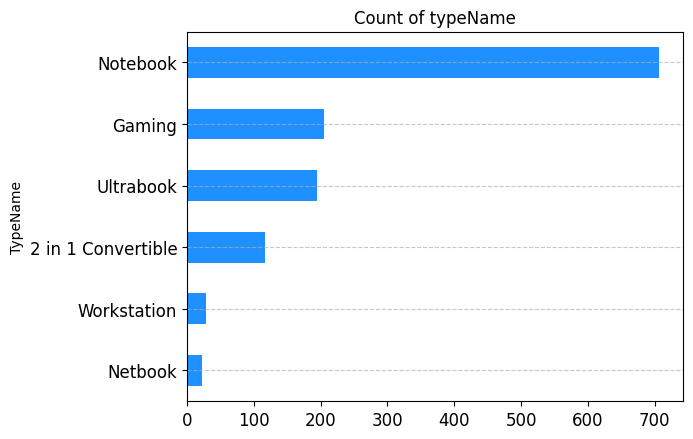

In [ ]:
df['TypeName'].value_counts().sort_values(ascending=True).plot(kind='barh', color='dodgerblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Count of typeName")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

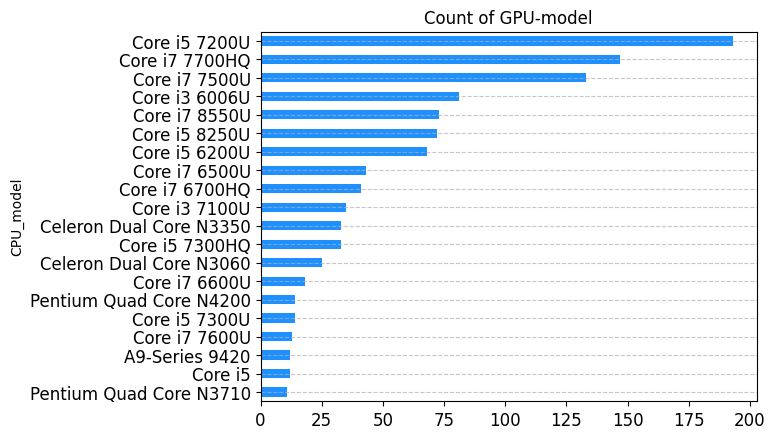

In [ ]:
df['CPU_model'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh', color='dodgerblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Count of GPU-model")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

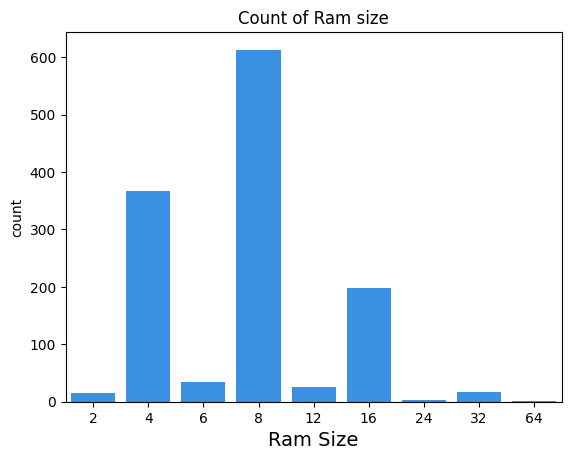

In [ ]:
sns.countplot(x='Ram', data=df, color='dodgerblue')
plt.title("Count of Ram size")
plt.xlabel('Ram Size', fontsize=14, c='k')
plt.show()

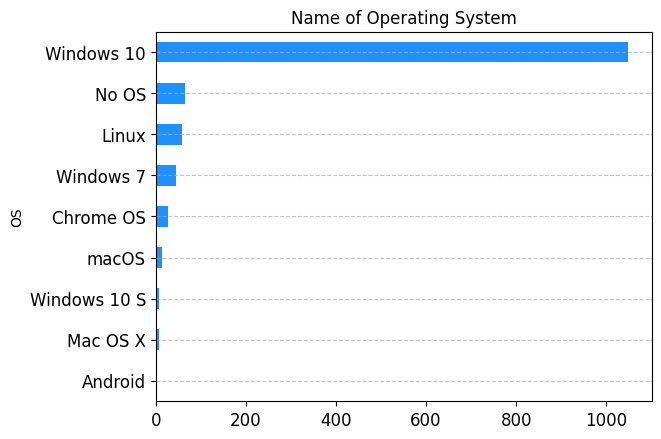

In [ ]:
df['OS'].value_counts().sort_values(ascending=True).plot(kind='barh', color='dodgerblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Name of Operating System")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

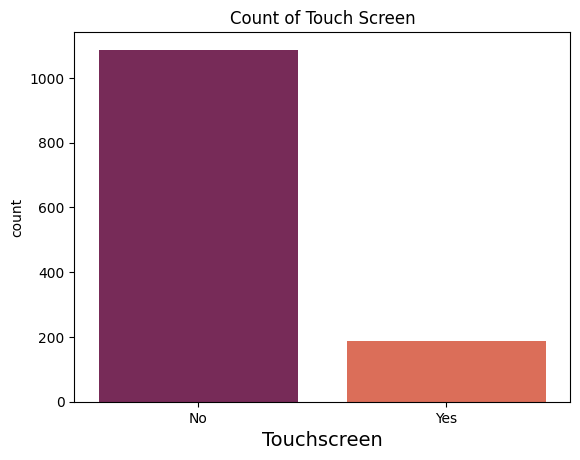

In [ ]:
sns.countplot(x='Touchscreen', data=df, palette='rocket', hue='Touchscreen')
plt.title("Count of Touch Screen")
plt.xlabel("Touchscreen", fontsize=14, c='k')
plt.show()

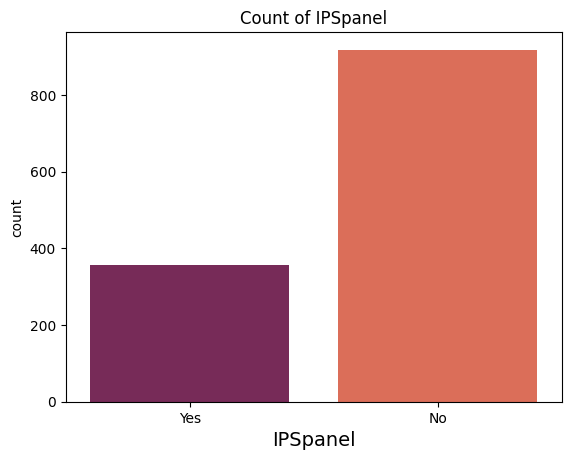

In [ ]:
sns.countplot(x='IPSpanel', data=df, palette='rocket', hue='IPSpanel',color='skyblue')
plt.title("Count of IPSpanel")
plt.xlabel("IPSpanel", fontsize=14, c='k')
plt.show()

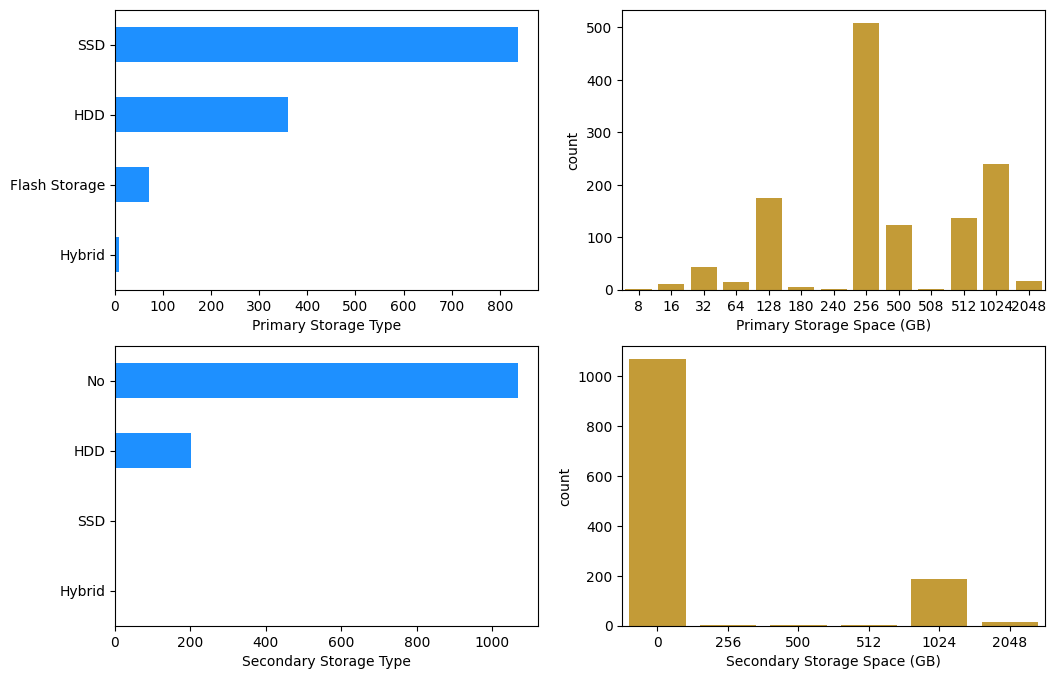

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
df['PrimaryStorageType'].value_counts().sort_values(ascending=True).plot(kind='barh', color='dodgerblue')
plt.xlabel('Primary Storage Type')
plt.ylabel('')
plt.subplot(2, 2, 2)
sns.countplot(df, x='PrimaryStorage',color='goldenrod')
plt.xlabel('Primary Storage Space (GB)')
plt.subplot(2, 2, 3)
df['SecondaryStorageType'].value_counts().sort_values(ascending=True).plot(kind='barh', color ='dodgerblue')
plt.xlabel('Secondary Storage Type')
plt.ylabel('')
plt.subplot(2, 2, 4)
sns.countplot(df, x='SecondaryStorage',color='goldenrod')
plt.xlabel('Secondary Storage Space (GB)')

plt.show()

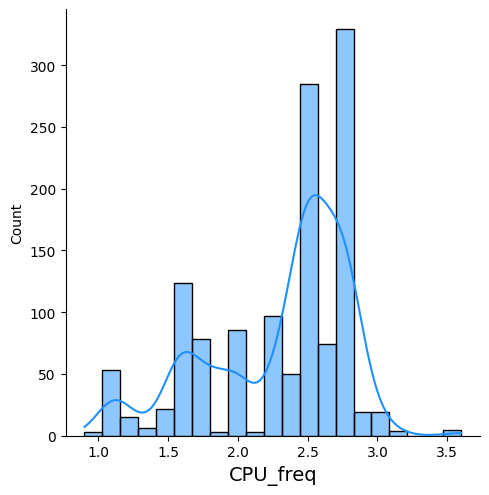

In [ ]:
sns.displot(x='CPU_freq', data=df, kde=True, color='dodgerblue')
plt.xlabel('CPU_freq', fontsize=14)
plt.show()

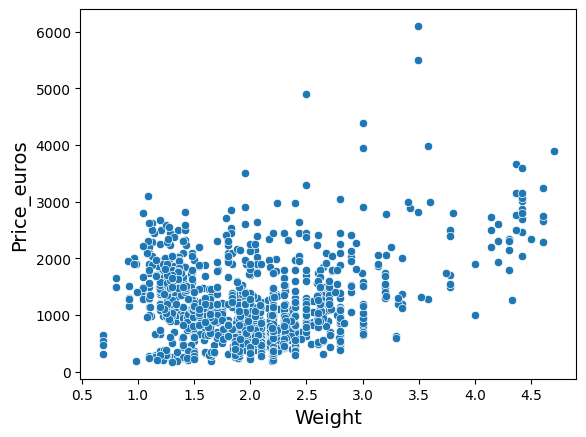

In [ ]:
sns.scatterplot(x='Weight', y='Price_euros',data=df)
plt.xlabel('Weight', fontsize=14, c='k')
plt.ylabel("Price_euros", fontsize=14, c='k')
plt.show()

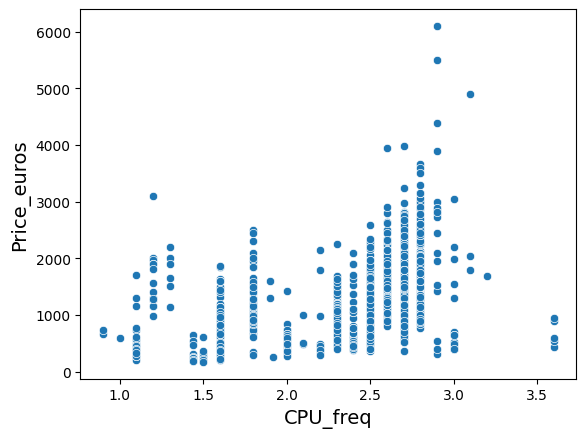

In [ ]:
sns.scatterplot(x='CPU_freq', y='Price_euros',data=df)
plt.xlabel('CPU_freq', fontsize=14, c='k')
plt.ylabel("Price_euros", fontsize=14, c='k')
plt.show()

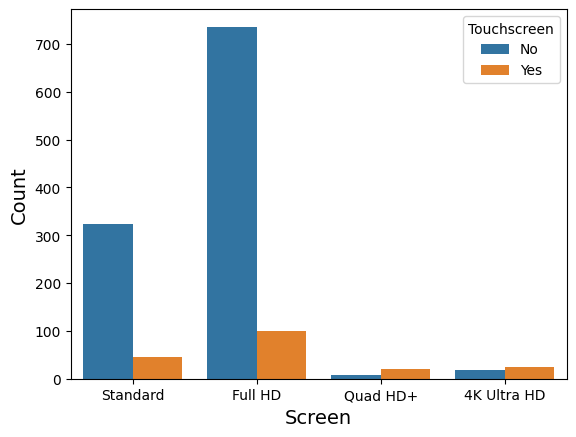

In [ ]:
sns.countplot(x='Screen', hue='Touchscreen',data=df)
plt.xlabel('Screen', fontsize=14, c='k')
plt.ylabel("Count", fontsize=14, c='k')
plt.show()

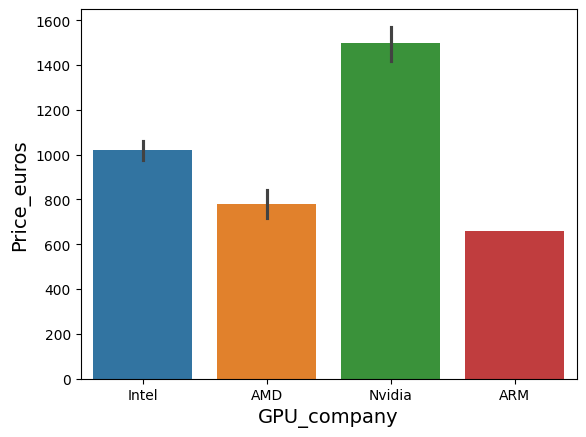

In [ ]:
sns.barplot(x='GPU_company',y='Price_euros',data=df,estimator=np.mean, hue='GPU_company')
plt.xlabel('GPU_company',fontsize=14,c='k')
plt.ylabel('Price_euros',fontsize=14,c='k')
plt.show()

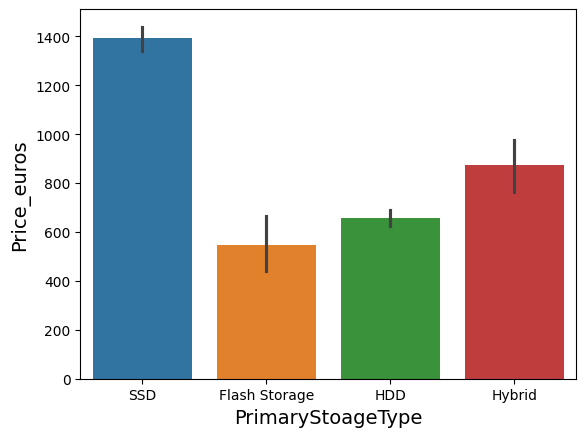

In [ ]:
sns.barplot(x='PrimaryStorageType',y='Price_euros',data=df,estimator=np.mean, hue='PrimaryStorageType')
plt.xlabel('PrimaryStoageType',fontsize=14,c='k')
plt.ylabel('Price_euros',fontsize=14,c='k')
plt.show()

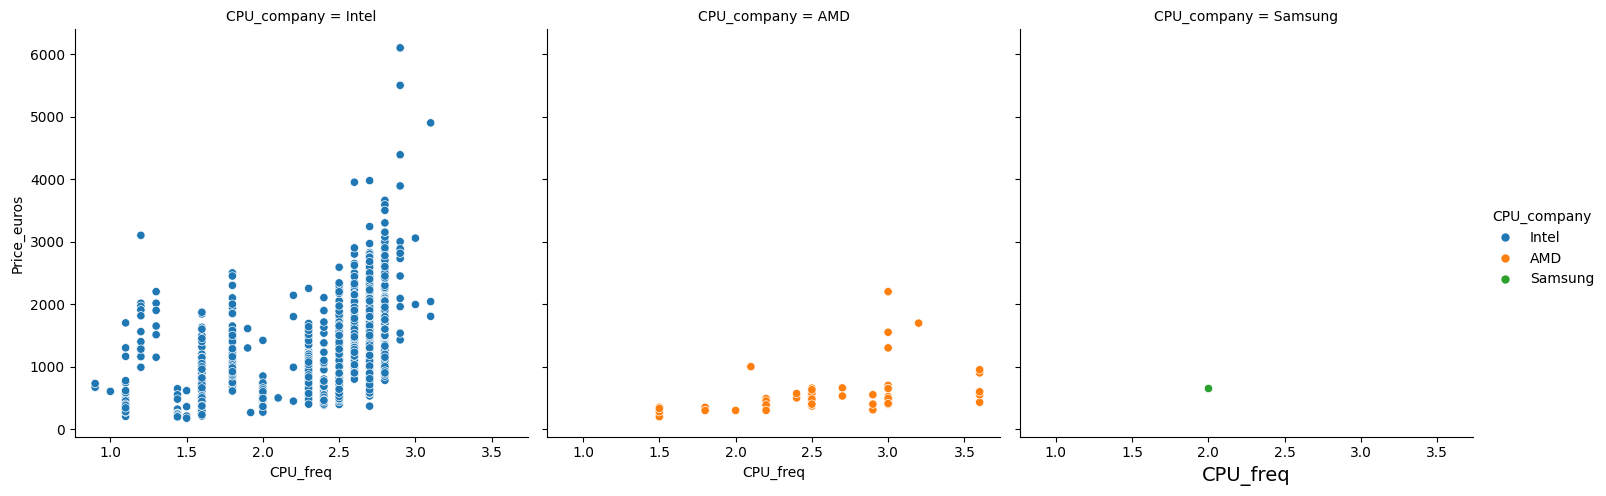

In [ ]:
sns.relplot(x='CPU_freq', y='Price_euros', data=df, hue='CPU_company', col='CPU_company', col_wrap=3)
plt.xlabel('CPU_freq', fontsize=14,  c='k')
plt.ylabel('Price_euros', fontsize=14, c='k')
plt.show()

In [ ]:
df = pd.get_dummies(df, columns = ["Company","Product","TypeName","OS","Screen","Touchscreen","IPSpanel","RetinaDisplay","CPU_company","CPU_model","PrimaryStorageType","SecondaryStorageType","GPU_company","GPU_model"],drop_first=True)

In [ ]:
df.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,...,GPU_model_Radeon R7 M440,GPU_model_Radeon R7 M445,GPU_model_Radeon R7 M460,GPU_model_Radeon R7 M465,GPU_model_Radeon R9 M385,GPU_model_Radeon RX 540,GPU_model_Radeon RX 550,GPU_model_Radeon RX 560,GPU_model_Radeon RX 580,GPU_model_UHD Graphics 620
0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0,True,...,False,False,False,False,False,False,False,False,False,False
1,13.3,8,1.34,898.94,1440,900,1.8,128,0,True,...,False,False,False,False,False,False,False,False,False,False
2,15.6,8,1.86,575.00,1920,1080,2.5,256,0,False,...,False,False,False,False,False,False,False,False,False,False
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0,True,...,False,False,False,False,False,False,False,False,False,False
4,13.3,8,1.37,1803.60,2560,1600,3.1,256,0,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [ ]:
outliers_ram = detect_outliers(df, 'Ram')
outliers_ram.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,...,GPU_model_Radeon R7 M440,GPU_model_Radeon R7 M445,GPU_model_Radeon R7 M460,GPU_model_Radeon R7 M465,GPU_model_Radeon R9 M385,GPU_model_Radeon RX 540,GPU_model_Radeon RX 550,GPU_model_Radeon RX 560,GPU_model_Radeon RX 580,GPU_model_UHD Graphics 620
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0,True,...,False,False,False,False,False,False,False,False,False,False
6,15.4,16,2.04,2139.97,2880,1800,2.2,256,0,True,...,False,False,False,False,False,False,False,False,False,False
8,14.0,16,1.30,1495.00,1920,1080,1.8,512,0,False,...,False,False,False,False,False,False,False,False,False,False
12,15.4,16,1.83,2439.97,2880,1800,2.8,256,0,True,...,False,False,False,False,False,False,False,False,False,False
17,15.4,16,1.83,2858.00,2880,1800,2.9,512,0,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
outliers_weight = detect_outliers(df, 'Weight')
outliers_weight.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,...,GPU_model_Radeon R7 M440,GPU_model_Radeon R7 M445,GPU_model_Radeon R7 M460,GPU_model_Radeon R7 M465,GPU_model_Radeon R9 M385,GPU_model_Radeon RX 540,GPU_model_Radeon RX 550,GPU_model_Radeon RX 560,GPU_model_Radeon RX 580,GPU_model_UHD Graphics 620
177,18.4,32,4.40,2799.00,1920,1080,2.9,512,1024,False,...,False,False,False,False,False,False,False,False,False,False
224,17.3,16,4.42,2456.34,1920,1080,2.8,256,1024,False,...,False,False,False,False,False,False,False,False,False,False
238,17.3,32,4.70,3890.00,1920,1080,2.9,512,1024,False,...,False,False,False,False,False,False,False,False,False,False
247,17.3,16,3.60,2999.00,1920,1080,2.9,256,0,False,...,False,False,False,False,False,False,False,False,False,False
251,17.3,16,4.30,1799.00,1920,1080,2.8,256,1024,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
outliers_price = detect_outliers(df, 'Price_euros')
outliers_price.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,...,GPU_model_Radeon R7 M440,GPU_model_Radeon R7 M445,GPU_model_Radeon R7 M460,GPU_model_Radeon R7 M465,GPU_model_Radeon R9 M385,GPU_model_Radeon RX 540,GPU_model_Radeon RX 550,GPU_model_Radeon RX 560,GPU_model_Radeon RX 580,GPU_model_UHD Graphics 620
17,15.4,16,1.83,2858.0,2880,1800,2.9,512,0,True,...,False,False,False,False,False,False,False,False,False,False
196,17.3,32,3.49,6099.0,3840,2160,2.9,1024,0,False,...,False,False,False,False,False,False,False,False,False,False
204,15.6,16,2.80,3055.0,3840,2160,3.0,256,1024,False,...,False,False,False,False,False,False,False,False,False,False
238,17.3,32,4.70,3890.0,1920,1080,2.9,512,1024,False,...,False,False,False,False,False,False,False,False,False,False
247,17.3,16,3.60,2999.0,1920,1080,2.9,256,0,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
pd.set_option('display.max_columns', None)

df.sample(5)

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product_14-am079na (N3710/8GB/2TB/W10),Product_15-AC110nv (i7-6500U/6GB/1TB/Radeon,Product_15-AY023na (N3710/8GB/2TB/W10),Product_15-BA015wm (E2-7110/4GB/500GB/W10),Product_15-BS026nv (i5-7200U/8GB/256GB/Radeon,Product_15-BS028nv (i3-6006U/4GB/1TB/Radeon,Product_15-BS078nr (i7-7500U/8GB/1TB/W10),Product_15-BS101nv (i7-8550U/8GB/256GB/FHD/W10),Product_15-BS103nv (i5-8250U/6GB/256GB/Radeon,Product_15-BW004nv (A9-9420/4GB/256GB/Radeon,Product_15-BW037na (A9-9420/4GB/1TB/Radeon,Product_15-BW091ND (A9-9420/6GB/1TB,Product_15-BW094nd (A6-9220/8GB/128GB/W10),Product_15-ay047nv (i3-6006U/6GB/1TB/Radeon,Product_15-ba043na (A12-9700P/8GB/2TB/W10),Product_15-bs002nv (i3-6006U/4GB/128GB/FHD/W10),Product_15-bs005nv (i3-6006U/4GB/1TB,Product_15-bs011nv (i7-7500U/4GB/500GB/Radeon,Product_15-bs012nv (i7-7500U/8GB/1TB/Radeon,Product_15-bs015dx (i5-7200U/8GB/1TB/W10),Product_15-bs017nv (i7-7500U/8GB/256GB/Radeon,Product_15-bs018nq (i3-6006U/4GB/500GB/FHD/No,Product_15-bs023nv (i3-6006U/4GB/1TB/FHD/W10),Product_15-bs024nv (i5-7200U/8GB/128GB/W10),Product_15-bs025nv (i5-7200U/8GB/256GB/W10),Product_15-bs053od (i7-7500U/6GB/1TB/W10),Product_15-bs078cl (i7-7500U/8GB/2TB/W10),Product_15-bs190od (i5-8250U/4GB/1TB/W10),Product_15-bw000nv (E2-9000e/4GB/500GB/Radeon,Product_15-bw002nv (A6-9220/4GB/256GB/Radeon,Product_15-bw003nv (A9-Series-9420/4GB/256GB/FHD/W10),Product_15-bw007nv (A10-9620P/6GB/128GB/Radeon,Product_15-bw009nv (A12-9720P/6GB/1TB/Radeon,Product_15-bw011nv (A6-9220/4GB/1TB/FHD/W10),Product_15-cb003na (i5-7300HQ/8GB/1TB,Product_15-cd005nv (A9-9420/6GB/256GB/Radeon,Product_15-ra044nv (N3060/4GB/500GB/W10),Product_15-rb013nv (E2-9000e/4GB/500GB/W10),Product_17-AK091ND (A9-9420/8GB/1TB/W10),Product_17-BS037cl (i3-6006U/8GB/1TB/W10),Product_17-BS092ND (i3-6006U/8GB/256GB/W10),Product_17-X047na (i3-6006U/8GB/1TB/W10),Product_17-Y002nv (A10-9600P/6GB/2TB/Radeon,Product_17-ak001nv (A6-9220/4GB/500GB/Radeon,Product_17-ak002nv (A10-9620P/6GB/2TB/Radeon,Product_17-bs000nv I3,Product_17-bs001nv (i5-7200U/6GB/2TB/Radeon,Product_250 G4,Product_250 G5,Product_250 G6,Product_255 G6,Product_320-15ISK (i3-6006U/4GB/1TB/GeForce,Product_A541NA-GO342 (N3350/4GB/500GB/Linux),Product_A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce,Product_Alienware 15,Product_Alienware 17,Product_Aspire 1,Product_Aspire 3,Product_Aspire 5,Product_Aspire 7,Product_Aspire A315-31,Product_Aspire A315-51,Product_Aspire A515-51G,Product_Aspire A515-51G-32MX,Product_Aspire A515-51G-37JS,Product_Aspire A515-51G-59QF,Product_Aspire A517-51G,Product_Aspire A715-71G,Product_Aspire E5-475,Product_Aspire E5-575,Product_Aspire E5-576G,Product_Aspire E5-774G,Product_Aspire ES1-523,Product_Aspire ES1-531,Product_Aspire ES1-533,Product_Aspire ES1-572,Product_Aspire F5-573G,Product_Aspire F5-573G-510L,Product_Aspire R7,Product_Aspire VX5-591G,Product_B51-80 (i5-6200U/8GB/1008GB/Radeon,Product_B51-80 (i5-6200U/8GB/1TB/Radeon,Product_B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Product_B51-80 (i7-6500U/8GB/1008GB/Radeon,Product_Blade Pro,Product_Blade Stealth,Product_C740-C9QX (3205U/2GB/32GB/Chrome,Product_CB5-132T-C9KK (N3160/4GB/32GB/Chrome,Product_Chromebook 11,Product_Chromebook 13,Product_Chromebook 14,Product_Chromebook 15,Product_Chromebook 3,Product_Chromebook C202SA,Product_Chromebook C731-C78G,Product_Chromebook C738T-C2EJ,Product_Chromebook C910-C2ST,Product_Chromebook CB5-571-C1DZ,Product_Chromebook Flip,Product_Chromebook N23,Product_Chromebook Plus,Product_Chromebook X360,Product_E402WA-GA007T (E2-6110/4GB/64GB/W10,Product_E402WA-GA010T (E2-6110/2GB/32GB/W10),Product_E5 774G,Product_ENVY -,Product_ES1-523-84K7 (A8-7410/8GB/256GB/FHD/W10),Product_EliteBook 1

In [ ]:
scaler = MinMaxScaler()
df_for_training = df.copy()

df_for_training[['Price_euros', 'Inches', 'Weight', 'CPU_freq']] = scaler.fit_transform(df[['Price_euros', 'Inches', 'Weight', 'CPU_freq']])

df_for_training[['Price_euros', 'Inches', 'Weight', 'CPU_freq']].head()

,Price_euros,Inches,Weight,CPU_freq
0,0.196741,0.385542,0.169576,0.518519
1,0.122353,0.385542,0.162095,0.333333
2,0.067679,0.662651,0.291771,0.592593
3,0.398895,0.638554,0.284289,0.666667
4,0.275038,0.385542,0.169576,0.814815


In [ ]:
df_for_training['Price_Category'] = df['Price_euros'].apply(lambda x: 1 if x > 1000 else 0)

df_for_training.Price_Category.value_counts()

,count
Price_Category,
0,657
1,618


In [ ]:
y= df['Price_euros']
x=df.drop("Price_euros", axis=1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
rf = RandomForestRegressor()
model = rf.fit(x_train, y_train)
model.score(x_test, y_test)

0.8688312686873302